<h3>Question 1</h3>

<p>Assignment centrality is defined as the sum of the reciprocal of the distances rather than the reciprocal of the sum of the distances as defined by closeness centrality, which always assumes connectedness. Assignment centrality is therefore more useful when examining graphs that aren't strongly connected as any nodes that are not connected to another component would be at a distance of infinity from all nodes in that component, which would be difficult to use with a reciprocal of the sum of the distances. Assignment centrality bypasses this problem by assigning the reciprocal of the distance between nodes that are not connected to be 0, so when the reciprocals are summed, the paths between nodes that aren't connected can be ignored.</p>

<h3>Question 2</h3>

In [2]:
#create graph
Medici_Graph = {}
Medici_Graph['Medici'] = ['Albizzi','Tornabuoni','Ridolfi','Barbadori','Acciaiuoli','Salviati']
Medici_Graph['Albizzi'] = ['Medici','Ginori','Guadagni']
Medici_Graph['Tornabuoni'] = ['Medici','Guadagni','Ridolfi']
Medici_Graph['Ridolfi'] = ['Tornabuoni','Medici','Strozzi']
Medici_Graph['Barbadori'] = ['Medici','Castellani']
Medici_Graph['Acciaiuoli'] = ['Medici']
Medici_Graph['Salviati'] = ['Medici','Pazzi']
Medici_Graph['Ginori'] = ['Albizzi']
Medici_Graph['Guadagni'] = ['Albizzi','Tornabuoni','Lamberteschi','Bischeri']
Medici_Graph['Strozzi'] = ['Ridolfi','Bischeri','Peruzzi','Castellani']
Medici_Graph['Castellani'] = ['Barbadori','Strozzi','Peruzzi']
Medici_Graph['Pazzi'] = ['Salviati']
Medici_Graph['Lamberteschi'] = ['Guadagni']
Medici_Graph['Bischeri'] = ['Peruzzi','Strozzi','Guadagni']
Medici_Graph['Peruzzi'] = ['Bischeri','Strozzi','Castellani']
Medici_Graph['Pucci'] = []

In [3]:
def shortest_paths(graph):
    table = {}
    #calculating shortest paths for each node
    for family in graph:
        #keeping track of distances and which nodes visited/to visit
        distances = {family:0}
        to_visit = [family]
        visited = ['Pucci']
        #making exception for disconnected node
        if family == 'Pucci':
            for node in graph:
                distances[node] = 0
        else:
            #setting initial large distances for nodes
            for other in graph:
                if other == 'Pucci':
                    distances[other] = 0
                elif other != family:
                    distances[other] = 10
            #finding shortest paths until all nodes visited
            while len(visited)<len(graph.keys()):
                temp = []
                for current_node in to_visit:
                    for neighbour in graph[current_node]:
                        if neighbour not in visited:
                            dist = distances[current_node]+1
                            if dist<distances[neighbour]:
                                distances[neighbour] = dist
                            if neighbour not in to_visit and neighbour not in temp:
                                temp.append(neighbour)
                    visited.append(current_node)
                to_visit = temp[:]
        table[family] = distances
    return table
        
table = shortest_paths(Medici_Graph)    

import pandas as pd

#display table of distances
data = []
reciprocals = {}
for main_family in Medici_Graph:
    temp = []
    reciprocal = 0
    for family in Medici_Graph:
        distance = table[main_family][family]
        temp.append(distance)
        if distance != 0:
            reciprocal += 1/distance
    data.append(temp)
    reciprocals[main_family] = round(reciprocal,2)
df = pd.DataFrame(data, columns=Medici_Graph.keys())
display(df)

,Medici,Albizzi,Tornabuoni,Ridolfi,Barbadori,Acciaiuoli,Salviati,Ginori,Guadagni,Strozzi,Castellani,Pazzi,Lamberteschi,Bischeri,Peruzzi,Pucci
0,0,1,1,1,1,1,1,2,2,2,2,2,3,3,3,0
1,1,0,2,2,2,2,2,1,1,3,3,3,2,2,3,0
2,1,2,0,1,2,2,2,3,1,2,3,3,2,2,3,0
3,1,2,1,0,2,2,2,3,2,1,2,3,3,2,2,0
4,1,2,2,2,0,2,2,3,3,2,1,3,4,3,2,0
5,1,2,2,2,2,0,2,3,3,3,3,3,4,4,4,0
6,1,2,2,2,2,2,0,3,3,3,3,1,4,4,4,0
7,2,1,3,3,3,3,3,0,2,4,4,4,3,3,4,0
8,2,1,1,2,3,3,3,2,0,2,3,4,1,1,2,0
9,2,3,2,1,2,3,3,4,2,0,1,4,3,1,1,0


In [4]:
print(reciprocals)

{'Medici': 9.5, 'Albizzi': 7.83, 'Tornabuoni': 7.83, 'Ridolfi': 8.0, 'Barbadori': 7.08, 'Acciaiuoli': 5.92, 'Salviati': 6.58, 'Ginori': 5.33, 'Guadagni': 8.08, 'Strozzi': 7.83, 'Castellani': 6.92, 'Pazzi': 4.77, 'Lamberteschi': 5.37, 'Bischeri': 7.2, 'Peruzzi': 6.78, 'Pucci': 0}


<p>We can therefore see that the results support the theory that the Medici's power was a result of their position in the network as the Medici family had the greatest assignment centrality, followed by the Guadagni and Ridolfi families.</p>

<h3>Question 3</h3>

In [5]:
from queue import PriorityQueue

#Newman's agglomerative algorithm
def Newman(graph):
    #initialising
    communities = {}
    total_edges = 0
    total_endpoints = 0
    modularity = 0
    modularities = [0]
    iterations = [[]]
    
    #creating dictionary of initial nodes and their endpoints
    for node in graph:
        communities[node] = {node:len(graph[node])}
        total_endpoints+=len(graph[node])
    total_edges = int(total_endpoints/2)
    
    #recording for future display
    for key in communities.keys():
        iterations[0].append({key})
    
    #calculating change in modularity for pair of communities
    def deltaQ(pair):
        edges = pairs[pair]
        endpoints = 1
        for community in pair:
            endpoints *= sum(communities[community].values())
        return (edges/total_edges)-(2*(endpoints/(total_endpoints**2)))
    
    #merging communities until all nodes in a single community
    while len(communities)>1:
        #creating dictionary of all possible community merges and the number of edges between them
        pairs = {}
        nodes = list(communities.keys())
        for i in range(len(nodes)):
            for j in range(i+1,len(nodes)):
                pair = (nodes[i],nodes[j])
                pairs[pair] = 0
                #accounting for communities composed of multiple nodes
                if type(nodes[i]) is tuple:
                    #iterate through nodes in community
                    for num in list(communities[nodes[i]].keys()):
                        for neighbour in list(communities[nodes[j]].keys()):
                            #add edge when node of other community is neighbour
                            if num in graph[neighbour]:
                                pairs[pair] += 1
                else:
                    for neighbour in list(communities[nodes[j]].keys()):
                        if nodes[i] in graph[neighbour]:
                            pairs[pair] += 1
        
#         #create priority queue of pairs to determine the merge with the greatest change in modularity
#         #had some issues on the Zachary dataset
#         order = PriorityQueue()
#         for pair in pairs.keys():
#             order.put((-1*deltaQ(pair),pair))
#         best_pair = order.get()
#         modularity += -1*best_pair[0]
#         modularities.append(modularity)

        #record the pair with the greatest change in modularity
        max_val = -100
        for pair in pairs.keys():
            new_val = deltaQ(pair)
            if new_val>max_val:
                max_val = new_val
                current_pair = pair
        best_pair = (max_val,current_pair)
        modularity += best_pair[0]
        modularities.append(modularity)
        
        #noting nodes and endpoints of new merged community
        communities[best_pair[1]] = {**communities[best_pair[1][0]],**communities[best_pair[1][1]]}
        #deleting separate communities now merged
        del communities[best_pair[1][0]]
        del communities[best_pair[1][1]]
        
        #add decomposition to results
        new_entry = []
        for key in communities.keys():
            group = []
            for node in communities[key].keys():
                group.append(node)
            new_entry.append(set(group))
        iterations.append(new_entry)
        
    return iterations,modularities

In [6]:
#constructing karate network
zachary = {
    1: [2,3,4,5,6,7,8,9,11,12,13,14,18,20,22,32],
    2: [1,3,4,8,14,18,20,22,31],
    3: [1,2,4,8,9,10,14,28,29,33],
    4: [1,2,3,8,13,14],
    5: [1,7,11],
    6: [1,7,11,17],
    7: [1,5,6,17],
    8: [1,2,3,4],
    9: [1,3,31,33,34],
    10: [3,34],
    11: [1,5,6],
    12: [1],
    13: [1,4],
    14: [1,2,3,4,34],
    15: [33,34],
    16: [33,34],
    17: [6,7],
    18: [1,2],
    19: [33,34],
    20: [1,2,34],
    21: [33,34],
    22: [1,2],
    23: [33,34],
    24: [26,28,30,33,34],
    25: [26,28,32],
    26: [24,25,32],
    27: [30,34],
    28: [3,24,25,34],
    29: [3,32,34],
    30: [24,27,33,34],
    31: [2,9,33,34],
    32: [1,25,26,29,33,34],
    33: [3,9,15,16,19,21,23,24,30,31,32,34],
    34: [9,10,14,15,16,19,20,21,23,24,27,28,29,30,31,32,33]
}

In [7]:
#run algorithm on network and display communities and modularities
iterations, modularities = Newman(zachary)
for i in range(len(iterations)):
    print(iterations[i]," Q =",round(modularities[i],3))

[{1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}]  Q = 0
[{1}, {2}, {3}, {4}, {5}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {17, 6}]  Q = 0.012
[{1}, {2}, {3}, {4}, {5}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {17, 6, 7}]  Q = 0.036
[{2}, {3}, {4}, {5}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {1, 17, 6, 7}]  Q = 0.048
[{2}, {3}, {4}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {1, 5, 6, 7, 17}] 

<p>The results are very close to what actually happened as when we take the community decomposition with the greatest modularity, we get the communities: A = {2, 3, 4, 8, 10, 13, 14, 18, 22}, B = {32, 33, 34, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31} and C = {1, 5, 6, 7, 11, 12, 17, 20} with Q = 0.43. If we were to take groups A and C on one side of the split and group B on the other, we notice that only node 10 is on the incorrect side of the observed split, which is understandable given that node 10 has one edge going to either side of the split. Even though A and C are in different communities, their grouping can be seen as the different sub-communities of that side of the split.</p>

<h3>Question 4</h3>

In [8]:
#read file
file = open('CCSB-Y2H.txt', 'r') 
lines = file.readlines() 
file.close()

#extract edges
lines = lines[1:]
contents = []
for line in lines:
    new_line = line.split("\t")
    new_line = new_line[:2]
    contents.append(new_line)
    
#put edges into dictionary
network = {}
for edge in contents:
    if edge[0] in network:
        network[edge[0]].append(edge[1])
    else:
        network[edge[0]] = [edge[1]]
    if edge[1] in network:
        network[edge[1]].append(edge[0])
    else:
        network[edge[1]] = [edge[0]]

In [9]:
#run algorithm on network
iterations, modularities = Newman(network)

In [10]:
#find best decomposition
qvalue = 0
best_iteration = iterations[0]
for i in range(len(modularities)):
    if modularities[i]>qvalue:
        qvalue = modularities[i]
        best_iteration = iterations[i]

#write best decomposition to file with communities on separate lines
file = open('decomposition.txt', 'w')
for community in best_iteration:
    line = [node for node in community]
    words = ",".join(line)+"\n"
    file.write(words)
file.close()

In [11]:
#investigating similarity in quality of decompositions
print("best modularity:",qvalue)
count = 0
for val in modularities:
    if qvalue-0.0001<=val:
        count+=1
print("number of decompositions within 0.0001:",count)

best modularity: 0.6712740272594402
number of decompositions within 0.0001: 90


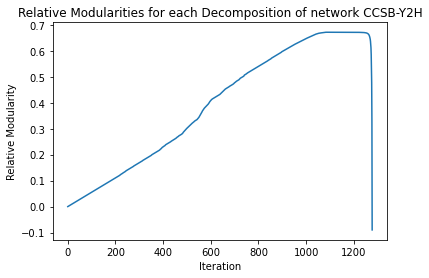

In [12]:
#plotting distribution of modularities
import matplotlib.pyplot as plt

#plot modularities for each iteration
plt.xlabel('Iteration')
plt.ylabel('Relative Modularity')
plt.title('Relative Modularities for each Decomposition of network CCSB-Y2H')

numbers = [i for i in range(len(iterations))]

plt.plot(numbers, modularities)

# Display a figure.
plt.show()

<p>Yes, there are many decompositions of similar quality. Looking at the modularities of the decompositions, we can see that 90 are within 0.0001 relative modularity of the best decomposition, which is a lot for such a small change in modularity. The graph above shows how the relative modularities gradually increase over the iterations of the algorithm, followed by a steep drop after the optimal decomposition has been found. We can see from this graph that the peak is relatively flat and lasts for roughly 200 iterations, suggesting that roughly 200 decompositions are of similar quality to the optimal decomposition.</p>

<h3>Question 5</h3>

<p>Depending on the network and the threshold value a, the community finder algorithm has a reasonable chance of successfully finding most community members in a network but is unlikely to separate into the optimal communities unless the network is of a certain shape. In particular, the algorithm will perform well on networks with high local clustering, composed of many cliques or well-connected components linked to each other by very few edges. In this case, the delta value should drop off steeply and fall below the threshold once the nodes at distance i+1 from v link to another community. However, the algorithm may not perform well on more complex networks such as large networks with many connections between communities, networks that are dense in some parts and sparse in others, or networks where the links are relatively random and communities are less clear. Networks such as these would require highly tailored values of the threshold a for each node v to account for the sparsity or density of the nodes around v. Another issue with the algorithm is that some nodes may be missed or accidentally included in a community if the delta value falls above or below the threshold due to the other nodes at distance i from v. For example, a node at distance i+1 from v that has many more connections to another community than the community v belongs to should not belong to the same community as v. However, if the nodes at distance i in the same community as v have many connections and so the delta value of i doesn't fall below the threshold a, this node at distance i+1 will be included in the same community as v. This could then lead to a separate community being merged with the community of v if a node at distance i+1 has many connections in a different community and so the threshold is not passed in the next iteration either. The reverse situation could also happen where some nodes at distance i are highly connected, but if others aren't and the threshold is high, the community finder algorithm may stop there and miss nodes from the community. This problem stems from the fact that all nodes at distance l are included in the community of v.</p>

<h3>Question 6</h3>

In [198]:
#community finder algorithm 
def community_finder(N,v,a):
    #initialise variables
    nodes = [v]
    prev_nodes = []
    next_nodes = []
    prev_edges = 0
    delta = len(N[v])
    
    #record values for later
    deltas = []
    deltas.append(delta)
    sizes = []
    
    #expanding community until threshold reached
    while delta >= a:
        #count edges from nodes at distance i to nodes at distance i+1
        edges = 0
        for node in nodes:
            for neighbour in N[node]:
                if neighbour not in nodes and neighbour not in prev_nodes:
                    edges+=1
                    if neighbour not in next_nodes:
                        next_nodes.append(neighbour)
            prev_nodes.append(node)
        #prepare for next iteration
        nodes = next_nodes
        sizes.append(len(prev_nodes))
        
        next_nodes = []
        #calculate delta value
        if prev_edges != 0:
            delta = edges/prev_edges
            deltas.append(delta)
        prev_edges = edges
    return prev_nodes,deltas,sizes

In [68]:
#investigating how delta values change size of community 
all_deltas = []
all_sizes = []
for key in zachary.keys():
    community,deltas,sizes = community_finder(zachary,key,0.01)
    all_deltas.append(deltas)
    all_sizes.append(sizes)

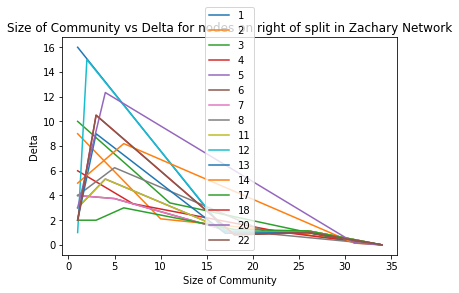

In [67]:
#plot delta vs size of community
plt.xlabel('Size of Community')
plt.ylabel('Delta')
plt.title('Size of Community vs Delta for nodes on right of split in Zachary Network')

right = [1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]
for i in range(len(all_deltas)):
    if i+1 in right:
        plt.plot(all_sizes[i],all_deltas[i],label=i+1)

plt.legend()
plt.show()

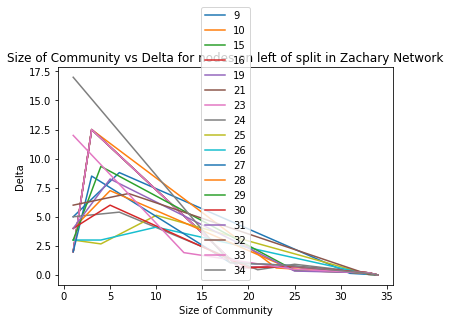

In [78]:
#plot delta vs size of community
plt.xlabel('Size of Community')
plt.ylabel('Delta')
plt.title('Size of Community vs Delta for nodes on left of split in Zachary Network')

left = [9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34]
for i in range(len(all_deltas)):
    if i+1 not in right:
        plt.plot(all_sizes[i],all_deltas[i],label=i+1)

plt.legend()
plt.show()

In [114]:
#find the best community of a node that can be generated by community_finder
def best_community(node):
    #initialise
    community,deltas,sizes = community_finder(zachary,node,0.01)
    scores = []
    communities =[]
    additions = []
    missing_nodes = []
    
    #check side of split node is on
    if node in right:
        side = right
    else:
        side = left
        
    #cycle through communities found by algorithm
    for delta in deltas:
        score = 0
        additional = 0
        missing = 0
        community,deltas,sizes = community_finder(zachary,node,delta+0.1)
        #calculate score of community depending on observed split
        for vertex in community:
            if vertex in side:
                score+=1
            else:
                additional+=1
                score-=1
        for vertex in side:
            if vertex not in community:
                missing+=1
                score-=1
        scores.append(score)
        communities.append(community)
        additions.append(additional)
        missing_nodes.append(missing)
    #figure out which community is best
    max_score = -10
    best = community
    added = 0
    missed = 0
    for i in range(len(scores)):
        if scores[i]>max_score:
            max_score = scores[i]
            best = communities[i]
            added = additions[i]
            missed = missing_nodes[i]
            delta = deltas[i]
    return best,max_score,added,missed,delta

In [121]:
#statistics of best community of each node on right side of split
scores = []
additional = []
missed = []
for node in right:
    best,score,added,missing,delta = best_community(node)
    print("node:",node,"score:",score,"best delta:",delta,"additional nodes:",added,"missing nodes:",missing)
    print(best)
    scores.append(score)
    additional.append(added)
    missed.append(missing)
print("average score:",round(sum(scores)/len(right),2))
print("average additional nodes in community:",round(sum(additional)/len(right),2))
print("average nodes missing in community:",round(sum(missed)/len(right),2))

node: 1 score: 12 best delta: 1.0625 additional nodes: 2 missing nodes: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]
node: 2 score: 6 best delta: 1.105263157894737 additional nodes: 8 missing nodes: 1
[2, 1, 3, 4, 8, 14, 18, 20, 22, 31, 5, 6, 7, 9, 11, 12, 13, 32, 10, 28, 29, 33, 34]
node: 3 score: -2 best delta: 0.20588235294117646 additional nodes: 16 missing nodes: 1
[3, 1, 2, 4, 8, 9, 10, 14, 28, 29, 33, 5, 6, 7, 11, 12, 13, 18, 20, 22, 32, 31, 34, 24, 25, 15, 16, 19, 21, 23, 30]
node: 4 score: 6 best delta: 1.05 additional nodes: 8 missing nodes: 1
[4, 1, 2, 3, 8, 13, 14, 5, 6, 7, 9, 11, 12, 18, 20, 22, 32, 31, 10, 28, 29, 33, 34]
node: 5 score: 14 best delta: 0.9375 additional nodes: 2 missing nodes: 0
[5, 1, 7, 11, 2, 3, 4, 6, 8, 9, 12, 13, 14, 18, 20, 22, 32, 17]
node: 6 score: 14 best delta: 1.0 additional nodes: 2 missing nodes: 0
[6, 1, 7, 11, 17, 2, 3, 4, 5, 8, 9, 12, 13, 14, 18, 20, 22, 32]
node: 7 score: 14 best delta: 1.0 additional nodes: 2 missing node

In [122]:
#statistics of best community of each node on left side of split
scores = []
additional = []
missed = []
for node in left:
    best,score,added,missing,delta = best_community(node)
    print("node:",node,"score:",score,"best delta:",delta,"additional nodes:",added,"missing nodes:",missing)
    print(best)
    scores.append(score)
    additional.append(added)
    missed.append(missing)
print("average score:",round(sum(scores)/len(left),2))
print("average additional nodes in community:",round(sum(additional)/len(left),2))
print("average nodes missing in community:",round(sum(missed)/len(left),2))

node: 9 score: 2 best delta: 0.0 additional nodes: 16 missing nodes: 0
[9, 1, 3, 31, 33, 34, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 20, 22, 32, 10, 28, 29, 15, 16, 19, 21, 23, 24, 30, 27, 17, 25, 26]
node: 10 score: 7 best delta: 0.6 additional nodes: 7 missing nodes: 2
[10, 3, 34, 1, 2, 4, 8, 9, 14, 28, 29, 33, 15, 16, 19, 20, 21, 23, 24, 27, 30, 31, 32]
node: 15 score: 11 best delta: 0.64 additional nodes: 3 missing nodes: 2
[15, 33, 34, 3, 9, 16, 19, 21, 23, 24, 30, 31, 32, 10, 14, 20, 27, 28, 29]
node: 16 score: 11 best delta: 0.64 additional nodes: 3 missing nodes: 2
[16, 33, 34, 3, 9, 15, 19, 21, 23, 24, 30, 31, 32, 10, 14, 20, 27, 28, 29]
node: 19 score: 11 best delta: 0.64 additional nodes: 3 missing nodes: 2
[19, 33, 34, 3, 9, 15, 16, 21, 23, 24, 30, 31, 32, 10, 14, 20, 27, 28, 29]
node: 21 score: 11 best delta: 0.64 additional nodes: 3 missing nodes: 2
[21, 33, 34, 3, 9, 15, 16, 19, 23, 24, 30, 31, 32, 10, 14, 20, 27, 28, 29]
node: 23 score: 11 best delta: 0.64 additional node

<p>The results show that the community finder algorithm compares poorly to the performance of Newman's agglomerative algorithm. We saw in question 3 that other than node 10 being on the wrong side of the split and the right side of the split having 2 communities, Newman's agglomerative algorithm perfectly encapsulated the communities of the Zachary network in terms of nodes on each side of the split. For the community finder algorithm, we generated for each node the community that was closest to the observed community of the side of the split that node was on. Scores were then calculated for each of these communities by incrementing the score when a node was correctly in the community, and decrementing the score when a node was missing from the community or was incorrectly in the community. From this, we can see that the communities generated for nodes on the right hand side of the split had 6.81 additional nodes on average and 0.62 nodes that were missing on average. These figures were 6.83 and 1.06 respectively for the additional and missing nodes for communities generated for nodes on the left hand side of the split. We can see from this that the community finder algorithm includes far more additional nodes in communities than Newman's agglomerative algorithm, with a comparable performance on missing nodes. As such, the community finder algorithm generates worse communities than Newman's agglomerative algorithm.</p>

<h3>Question 7</h3>

<p>The community finder algorithm could be used iteratively on arbitrary nodes that are not already in a community until all nodes are in at least one community. At this point, any nodes that are a part of multiple communities should have the community finder algorithm run on them and should choose to stay in the community that most closely matches the result by scoring the similarity between communities. After this, all nodes should have been sorted into separate communities. As you can see below, this can produce reasonable results as the results below are a fairly good match to the observed split in the Zachary dataset. However, the algorithm often puts all nodes in the same community so it may take some tweaking of the threshold value a and a more careful selection of the nodes used to generate the initial communities in order for the algorithm to give a consistently good performance.</p>

In [194]:
#function to give a score to how similar 2 communities are
def compare_communities(comm1,comm2):
    score = 0
    #increment when vertices match
    for vertex in comm1:
        if vertex in comm2:
            score+=1
        else:
            score-=1
    #decrement when vertices don't match
    for vertex in comm2:
        if vertex not in comm1:
            score-=1
    return score

In [197]:
import random

#initialising variables
communities = []
nodes = list(zachary.keys())
a = 1.2

#generating community for random node not already in community
while len(nodes)>0:
    node = random.sample(nodes,1)[0]
    community,deltas,sizes = community_finder(zachary,node,a)
    communities.append(community)
    for vertex in community:
        if vertex in nodes:
            nodes.remove(vertex)
    
#keep track of how many communities each node is in
tracker = {}
nodes = list(zachary.keys())
for node in nodes:
    part_of = []
    for i in range(len(communities)):
        if node in communities[i]:
            part_of.append(i)
    tracker[node] = part_of

#choosing the best community for each node in more than one community
for node in nodes:
    if len(tracker[node])>1:
        #generate community for node
        community,deltas,sizes = community_finder(zachary,node,a)
        max_score = -10
        best_index = 0
        #compare scores for generated community and communities node is part of
        for index in tracker[node]:
            score = compare_communities(community,communities[index])
            if score>max_score:
                score = max_score
                best_index = index
        #remove node from worst communities
        for index in tracker[node]:
            if index != best_index:
                communities[index].remove(node)
                
print("communities:")
for community in communities:
    print(sorted(community))


communities:
[10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22, 32]
